<a href="https://colab.research.google.com/github/victorncg/financas_quantitativas/blob/main/Simula%C3%A7%C3%A3o_de_Carteiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

# **Simulação de Carteiras**

<center><img src = "https://github.com/victorncg/financas_quantitativas/blob/main/Captura%20de%20tela%202023-07-25%20154454.png?raw=true" width = "500">




**Para fins de simplificação**

* Apenas um aporte em cada ação
* Os aportes foram todos no mesmo dia

# 1. Importação das bibliotecas

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# 2. Configurar a nossa carteira

In [2]:
compras = {'VALE3.SA': 1400, 'WEGE3.SA': 1300,
          'BPAC11.SA': 1100, 'KNRI11.SA': 1000,
        	'SMAL11.SA': 800, 'AAPL34.SA': 700, 'IVVB11.SA': 500,
		      'PETR4.SA': 1000,'COCA34.SA': 1000}

In [5]:
list(compras.keys())

['VALE3.SA',
 'WEGE3.SA',
 'BPAC11.SA',
 'KNRI11.SA',
 'SMAL11.SA',
 'AAPL34.SA',
 'IVVB11.SA',
 'PETR4.SA',
 'COCA34.SA']

In [7]:
sum(compras.values())

8800

# 3. Importando os dados

In [9]:
inicio = '2020-01-01'
fim = '2023-07-01'

In [13]:
precos = yf.download(list(compras.keys()), start = inicio, end = fim, progress = False)['Adj Close']

# 4. Simulação da carteira fictícia

In [15]:
primeiro = precos.iloc[0]

In [19]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))

Quantidade de papéis comprados de cada ativo

In [22]:
qtd_acoes = round(compras_df/primeiro, 0)

In [24]:
PL = precos*qtd_acoes

In [25]:
PL['PL Total'] = PL.sum(axis = 1)

In [27]:
PL.head()

,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,
2020-01-02,696.311883,1098.324097,989.487823,562.400024,1077.411072,998.768549,837.000000,1385.263214,1307.959019,8952.925681
2020-01-03,697.689150,1101.511322,975.998505,562.799988,1077.411072,990.635223,845.399963,1375.064049,1291.256847,8917.766119
2020-01-06,701.132250,1099.917709,978.863613,564.799988,1068.666504,1002.347040,834.600037,1366.905117,1294.597698,8911.829956
2020-01-07,702.853845,1104.306175,978.863613,565.200012,1072.822815,998.443232,836.399963,1376.849003,1304.618465,8940.357123
2020-01-08,708.764479,1094.519341,978.378738,566.200012,1012.096893,992.261810,829.199982,1377.103882,1255.254627,8813.779764


In [28]:
PL.tail()

,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,
2023-06-26,2071.760086,1865.580009,1408.529991,912.000000,932.918793,2528.880013,649.500000,2311.400032,2828.599434,15509.168358
2023-06-27,2124.400036,1853.799976,1420.130035,928.080017,935.949829,2509.200031,637.800018,2339.050064,2836.370453,15584.780460
2023-06-28,2152.599964,1860.000000,1414.910027,938.960022,944.983704,2532.979950,638.099991,2265.200043,2842.587090,15590.320789
2023-06-29,2163.409943,1918.900047,1409.399956,940.000000,955.681641,2544.460056,652.800018,2292.850075,2862.791382,15740.293118
2023-06-30,2177.039986,1949.900047,1397.800022,941.000000,949.560059,2421.460056,657.000000,2247.700043,2933.506256,15674.966469


# 5. Comparação com o IBOV

In [29]:
ibov = yf.download('^BVSP', start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [33]:
ibov = pd.DataFrame(ibov)

In [34]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

Juntando tudo num dataframe só

In [36]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [37]:
consolidado.head()

,IBOV,AAPL34.SA,BPAC11.SA,COCA34.SA,IVVB11.SA,KNRI11.SA,PETR4.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,PL Total
Date,,,,,,,,,,,
2020-01-02,118573.0,696.311883,1098.324097,989.487823,562.400024,1077.411072,998.768549,837.000000,1385.263214,1307.959019,8952.925681
2020-01-03,117707.0,697.689150,1101.511322,975.998505,562.799988,1077.411072,990.635223,845.399963,1375.064049,1291.256847,8917.766119
2020-01-06,116878.0,701.132250,1099.917709,978.863613,564.799988,1068.666504,1002.347040,834.600037,1366.905117,1294.597698,8911.829956
2020-01-07,116662.0,702.853845,1104.306175,978.863613,565.200012,1072.822815,998.443232,836.399963,1376.849003,1304.618465,8940.357123
2020-01-08,116247.0,708.764479,1094.519341,978.378738,566.200012,1012.096893,992.261810,829.199982,1377.103882,1255.254627,8813.779764


Normalizando os dados para ajustar a escala

In [39]:
consolidado_ajustado = consolidado/consolidado.iloc[0]

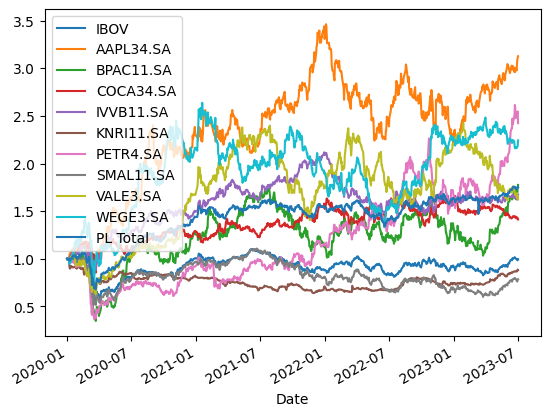

In [40]:
consolidado_ajustado.plot();

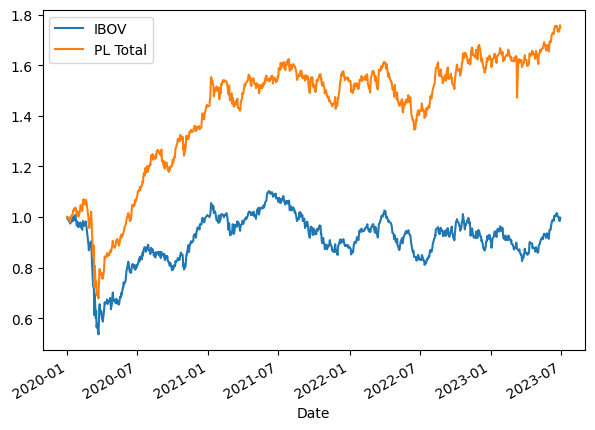

In [42]:
consolidado_ajustado[['IBOV', 'PL Total']].plot(figsize = (7,5));

# 6. Função para testar carteiras

In [44]:
def simulacao_carteira(inicio, fim, carteira):
  precos = yf.download(list(carteira.keys()), start = inicio, end = fim, progress = False)['Adj Close']
  primeiro = precos.iloc[0]
  compras_df = pd.Series(data = carteira, index = list(carteira.keys()))
  qtd_acoes = compras_df/primeiro
  qtd_acoes = round(qtd_acoes,0)
  PL = precos*qtd_acoes
  PL['PL Total'] = PL.sum(axis = 1)
  ibov = yf.download('^BVSP', start = inicio, end =  fim, progress = False)
  ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
  ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)
  consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')
  consolidado_adj = consolidado/consolidado.iloc[0]
  consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (8,6));

In [45]:
portfolio = {'PETR4.SA': 2000, 'ITUB4.SA': 1000, 'WEGE3.SA': 2000, 'VALE3.SA': 1000}

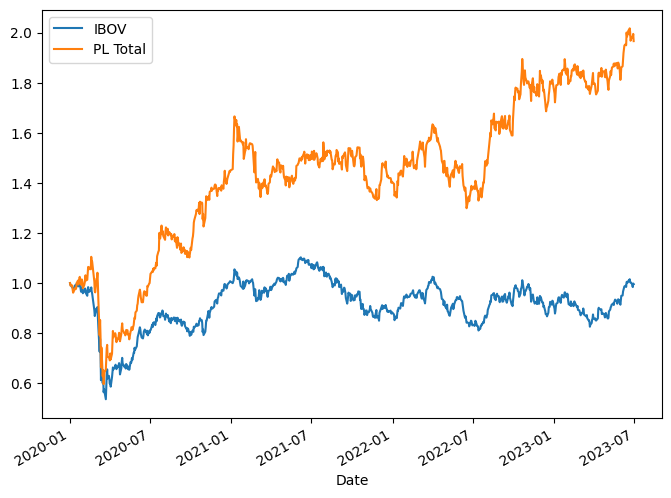

In [46]:
simulacao_carteira(inicio, fim, portfolio)